In [1]:
#########################
## KZTIHT for Tensors  ##
#########################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import rand, randn, choice, permutation
from scipy.linalg import hadamard

import torch
import torch.nn.functional as F

import tensorly as tl
from tensorly import decomposition
from tensorly.decomposition import parafac
from scipy import linalg

In [2]:
%run KZTIHT_Functions.ipynb

### Optimising Step Size for TIHT with Gaussian Measurements

In [9]:
cols = []
data = []

itr = 250
num_samples = 10
j = 0

r = [2,2,2]
n = 1000
n_dim = [10,10,10]
m = 600

for mu in [0.5,0.6,0.7,0.8,0.9,1]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu*1/m,itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

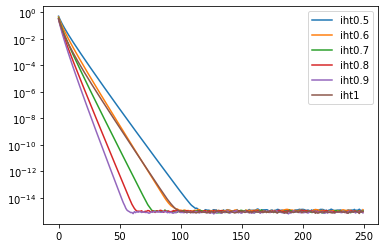

In [4]:
data.plot(logy=True)

In [5]:
cols = []
data = []

itr = 250
num_samples = 10
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 600

for mu in [0.5,0.6,0.7,0.8,0.9,1]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu*1/m,itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

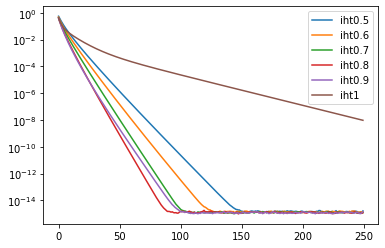

In [6]:
data.plot(logy=True)

In [7]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [4,4,4]
n = 1000
n_dim = [10,10,10]
m = 600

for mu in [0.5,0.6,0.7,0.8,0.9,1]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu*1/m,itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

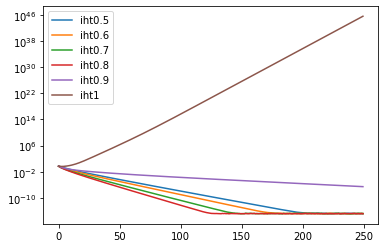

In [8]:
data.plot(logy=True)

### Optimising step size for KZTIHT w/ Gaussian Mx

In [19]:
cols = []
data = []

itr = 250
num_samples = 10
j = 0

r = [2,2,2]
n = 1000
n_dim = [10,10,10]
m = 600

for mu in [0.8,0.9,1,1.1,1.2,1.3]:
    
    avg_err_IHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

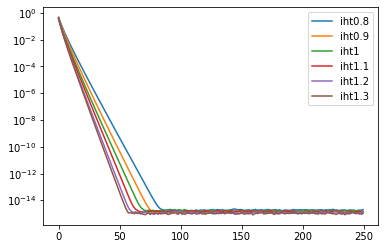

In [20]:
data.plot(logy=True)

In [21]:
cols = []
data = []

itr = 250
num_samples = 10
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 600

for mu in [0.8,0.9,1,1.1,1.2,1.3]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

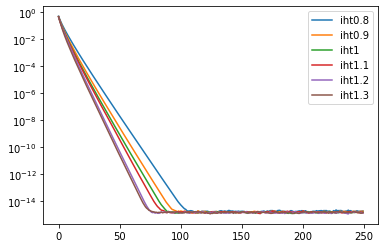

In [22]:
data.plot(logy=True)

In [23]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [4,4,4]
n = 1000
n_dim = [10,10,10]
m = 600

for mu in [0.8,0.9,1,1.1,1.2,1.3]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

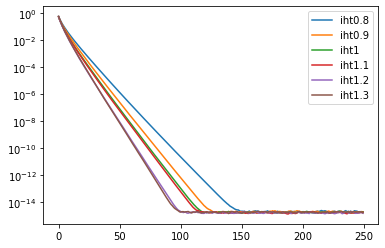

In [24]:
data.plot(logy=True)

### Optimising Step size for fixed rank varying mx.

##### Optimising for KZTIHT

In [ ]:
cols = []
data = []

itr = 500
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 300

for mu in [0.8,0.9,1,1.1,1.2]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

In [ ]:
data.plot(logy=True)

In [38]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 350

for mu in [0.8,0.9,1,1.1,1.2,1.3]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

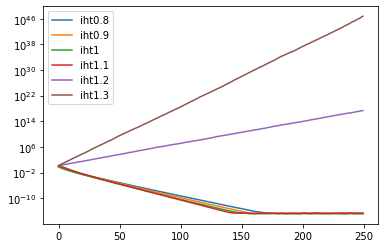

In [29]:
data.plot(logy=True)

In [30]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 400

for mu in [0.8,0.9,1,1.1,1.2,1.3]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

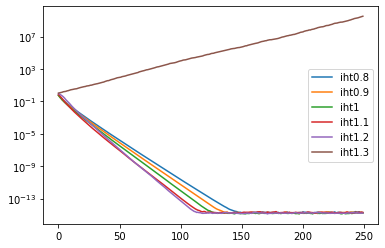

In [31]:
data.plot(logy=True)

In [32]:
cols = []
data = []

itr = 450
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 450

for mu in [0.8,0.9,1,1.1,1.2,1.3]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

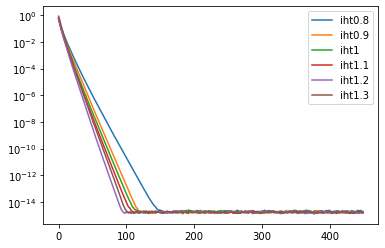

In [33]:
data.plot(logy=True)

In [34]:
cols = []
data = []

itr = 500
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 500

for mu in [0.8,0.9,1,1.1,1.2,1.3]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

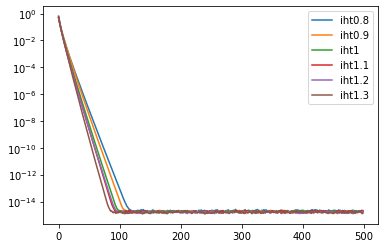

In [35]:
data.plot(logy=True)

##### Optimising for TIHT

In [49]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 300

for mu in [0.6,0.7,0.8,0.9,1]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu*1/m,itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

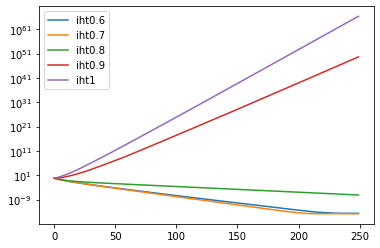

In [50]:
data.plot(logy=True)

In [39]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 350

for mu in [0.6,0.7,0.8,0.9,1]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu*1/m,itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

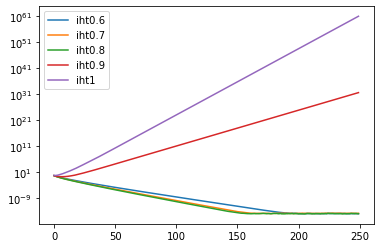

In [40]:
data.plot(logy=True)

In [41]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 400

for mu in [0.6,0.7,0.8,0.9,1]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu*1/m,itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

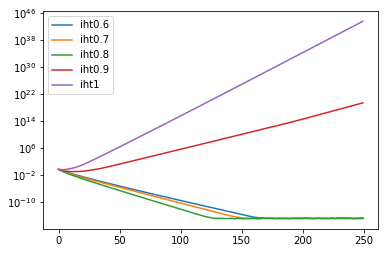

In [42]:
data.plot(logy=True)

In [43]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 450

for mu in [0.6,0.7,0.8,0.9,1]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu*1/m,itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

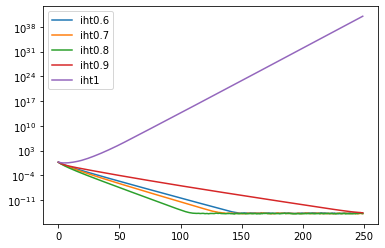

In [44]:
data.plot(logy=True)

In [45]:
cols = []
data = []

itr = 250
num_samples = 5
j = 0

r = [3,3,3]
n = 1000
n_dim = [10,10,10]
m = 500

for mu in [0.6,0.7,0.8,0.9,1]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(mu)]
        
    for samples in range(num_samples):
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu*1/m,itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        
    if j == 0:
        data = np.array([avg_err_IHT/num_samples]).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)

data = pd.DataFrame(data, columns = cols)

<AxesSubplot:>

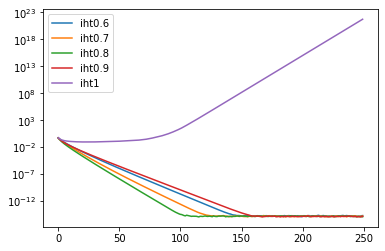

In [46]:
data.plot(logy=True)